-------------------
### Linear Transformation with Matrices
-------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)

xx, yy = np.meshgrid(x, y)

In [3]:
xx.shape, yy.shape

((20, 20), (20, 20))

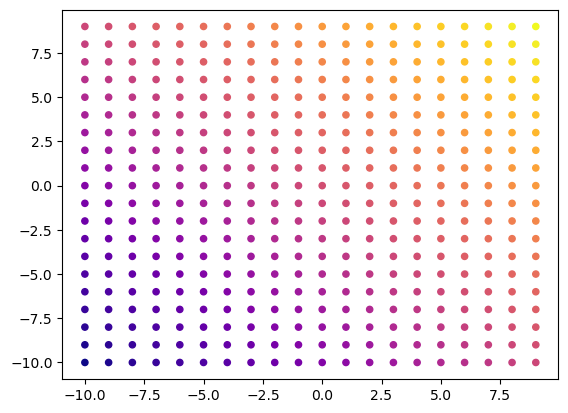

In [4]:
plt.scatter(xx,
            yy,
            s   = 20,
            c   = xx+yy,             # list of colors
            cmap='plasma');

The color corresponds to the addition of xx and yy values.

This will make transformations easier to visualize.

let’s visualize the transformation associated with the following two-dimensional square matrix.

$$T = \begin{bmatrix} -1 & 0 \\\\ 0 & -1 \end{bmatrix}$$

In [5]:
T = np.array([
    [-1, 0],
    [0, -1]])

Consider that each point of the grid is a vector defined by two coordinates (x
 and y
).

For now, you have two 20 by 20 matrices (xx and yy) corresponding to 20⋅20=400 points, each having a x
 value (matrix xx) and a y value (yy).

In [8]:
xx.flatten()

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,  -7,  -6,  -5,
        -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
         9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,  -7,  -6,
        -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,
         8,   9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
         1,   2,   3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,  -7,
        -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,
         7,   8,   9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,
         0,   1,   2,   3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,
        -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
         6,   7,   8,   9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
        -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9, -1

In [9]:
yy.flatten()

array([-10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10,
       -10, -10, -10, -10, -10, -10, -10,  -9,  -9,  -9,  -9,  -9,  -9,
        -9,  -9,  -9,  -9,  -9,  -9,  -9,  -9,  -9,  -9,  -9,  -9,  -9,
        -9,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,
        -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -7,  -7,  -7,  -7,  -7,
        -7,  -7,  -7,  -7,  -7,  -7,  -7,  -7,  -7,  -7,  -7,  -7,  -7,
        -7,  -7,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,
        -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -5,  -5,  -5,  -5,
        -5,  -5,  -5,  -5,  -5,  -5,  -5,  -5,  -5,  -5,  -5,  -5,  -5,
        -5,  -5,  -5,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,
        -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -3,  -3,  -3,
        -3,  -3,  -3,  -3,  -3,  -3,  -3,  -3,  -3,  -3,  -3,  -3,  -3,
        -3,  -3,  -3,  -3,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,
        -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -

In [10]:
xy =  np.vstack([xx.flatten(), yy.flatten()])
xy.shape

(2, 400)

In [12]:
xy

array([[-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,  -7,  -6,  -5,
         -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
          9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,  -7,  -6,
         -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,
          8,   9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,  -7,
         -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,
          7,   8,   9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,
          0,   1,   2,   3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,
         -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
          6,   7,   8,   9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
         -1,   0,   1,   2,   3,   4,   5,   6,   7

In [11]:
xy[:, 0]

array([-10, -10])

Let’s apply the transformation matrix T  to the first two-dimensional point (xy[:, 0]), for instance:

In [13]:
T @ xy[:, 0]

array([10, 10])

You can similarly apply T to each point by calculating its product with the matrix containing all points:

In [14]:
trans = T @ xy
trans.shape

(2, 400)

You can see that the shape is still (2,400).

Each transformed vector (that is, each point of the grid) is one of the column of this new matrix.

Now, let’s reshape this array to have two arrays with a similar shape to xx and yy.

In [15]:
xx_transformed = trans[0].reshape(xx.shape)
yy_transformed = trans[1].reshape(yy.shape)

Let’s plot the grid before and after the transformation:

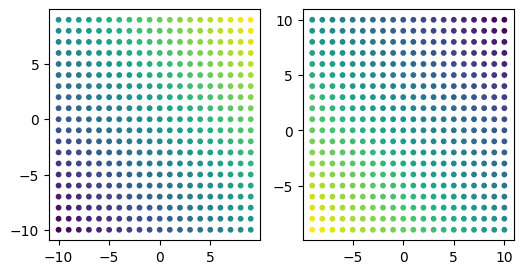

In [17]:
f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(xx_transformed, yy_transformed, s=10, c=xx+yy);

the matrix T rotated the points of the grid.

shape of the transformation matrix must match the shape of the vectors you want to transform.

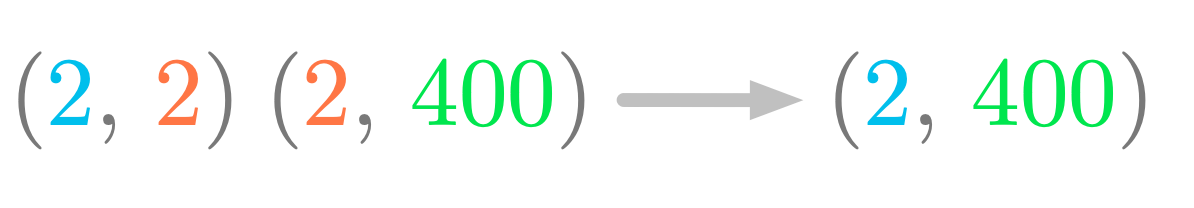

#### Stretching and Rotation
Let’s now visualize the transformation associated with the following matrix:

$$T = \begin{bmatrix} 1.3 & -2.4 \\\\ 0.1 & 2 \end{bmatrix}$$

In [18]:
T = np.array([
    [1.3, -2.4],
    [0.1,  2]
])

In [19]:
trans = T @ xy

In [20]:
xx_transformed = trans[0].reshape(xx.shape)
yy_transformed = trans[1].reshape(yy.shape)

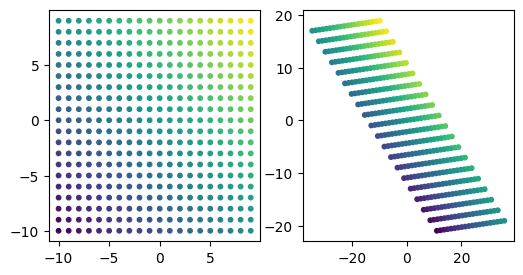

In [21]:
f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(xx_transformed, yy_transformed, s=10, c=xx+yy)

there is a rotation, but also a stretching of the space.